## Dynamic Pricing Strategy from a Data Science Perspective
Dynamic pricing is the practice of adjusting prices for products or services based on demand, supply, competition, and other external factors in real-time or near real-time.  
It relies heavily on data science techniques, machine learning, and optimization algorithms to maximize revenue, profit, or market share.

### Key Concepts in Dynamic Pricing
1. **Elasticity of Demand:** The relationship between price and demand. Understanding how demand changes in response to price adjustments is central to dynamic pricing.
2. **Market Segmentation:** Dividing the customer base into segments based on behavior, willingness to pay, or other factors. Dynamic pricing can be tailored for each segment.
3. **Competition Analysis:** Monitoring competitors’ prices and adjusting your own pricing strategy accordingly.
4. **External Factors:** Variables such as time, weather, events, or economic conditions that impact customer purchasing behavior.

By implementing a dynamic pricing strategy, the company can leverage data science techniques to analyze various factors such as historical trip data, real-time demand, traffic patterns, and events happening in the area.

To implement a data-driven dynamic pricing strategy, businesses typically require data that can provide insights into customer behaviour, market trends, and other influencing factors.  So to create a dynamic pricing strategy, we need to have a dataset based on:

1. historical sales data
2. customer purchase patterns
3. market demand forecasts
4. cost data
5. customer segmentation data, 
6. real-time market data.

### Main Task
Build a dynamic pricing model that incorporates the number of rides, number of drivers, location category, customer loyalty status and other features of the following dataset **to predict optimal fares for rides in real time**.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Datasets/dynamic_pricing.csv")

In [3]:
dataset.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


#### Exploratory Data Analysis

In [6]:
dataset.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


##### What is the distribution of historical ride costs?
(To understand baseline pricing trends)

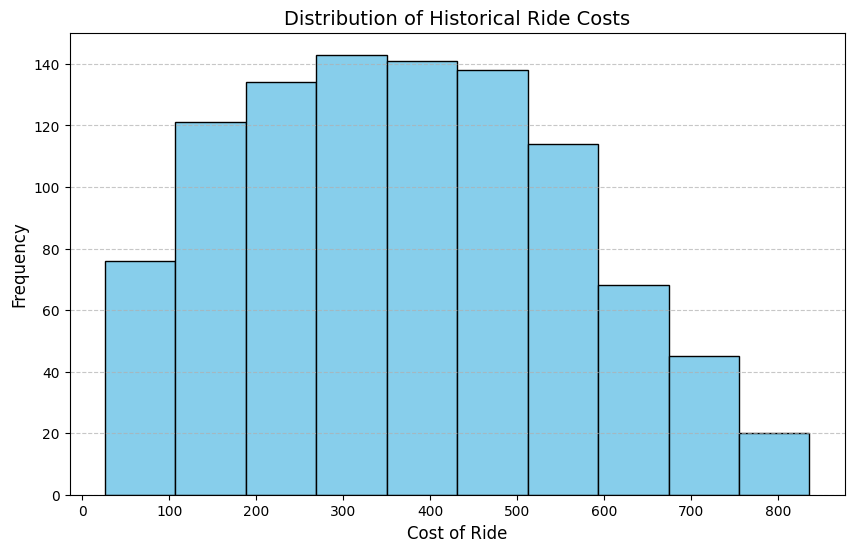

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(dataset["Historical_Cost_of_Ride"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Historical Ride Costs", fontsize=14)
plt.xlabel("Cost of Ride", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
dataset['Historical_Cost_of_Ride'].describe()

count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64

##### How does the number of riders correlate with the number of drivers?
(To assess supply-demand dynamics.)

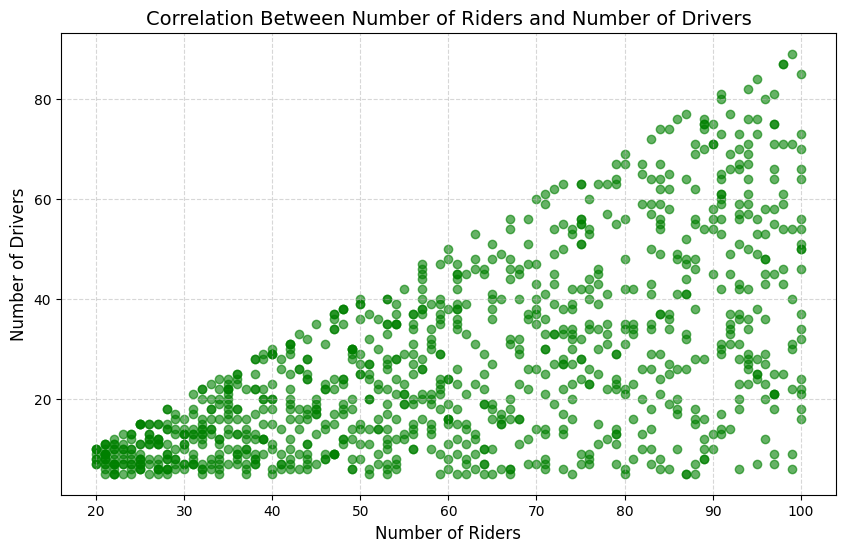

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset["Number_of_Riders"], dataset["Number_of_Drivers"], color='green', alpha=0.6)
plt.title("Correlation Between Number of Riders and Number of Drivers", fontsize=14)
plt.xlabel("Number of Riders", fontsize=12)
plt.ylabel("Number of Drivers", fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [13]:
dataset[["Number_of_Riders", "Number_of_Drivers"]].corr()

,Number_of_Riders,Number_of_Drivers
Number_of_Riders,1.000000,0.627016
Number_of_Drivers,0.627016,1.000000


##### How do ride costs vary across different location categories?
(To identify geographical price patterns)

<Figure size 1000x600 with 0 Axes>

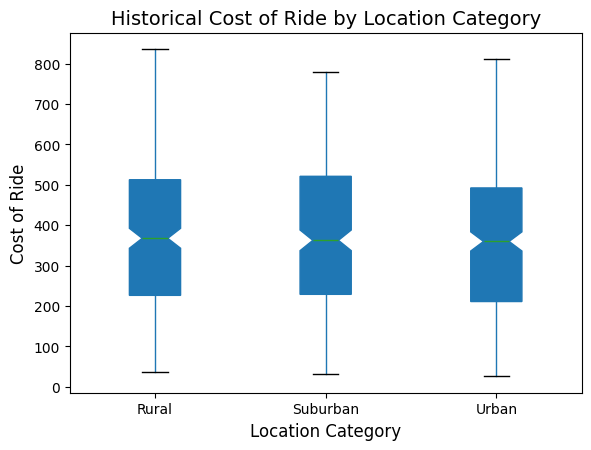

In [14]:
plt.figure(figsize=(10, 6))
dataset.boxplot(column="Historical_Cost_of_Ride", by="Location_Category", grid=False, notch=True, patch_artist=True)
plt.title("Historical Cost of Ride by Location Category", fontsize=14)
plt.suptitle("")  # Remove automatic title
plt.xlabel("Location Category", fontsize=12)
plt.ylabel("Cost of Ride", fontsize=12)
plt.show()

##### What is the impact of customer loyalty status on ride costs?
(To determine pricing adjustments for loyalty tiers.)

<Figure size 1000x600 with 0 Axes>

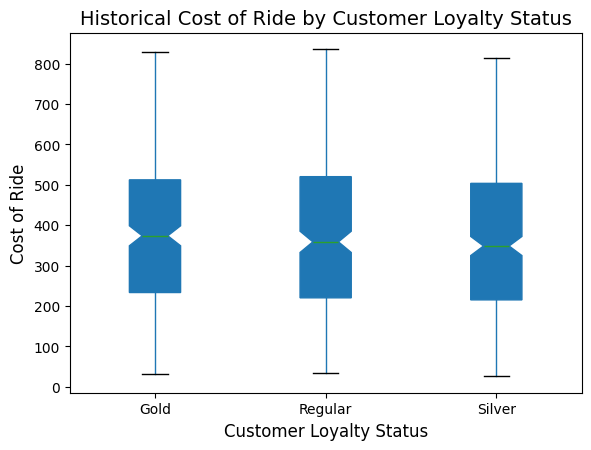

In [15]:
plt.figure(figsize=(10, 6))
dataset.boxplot(column="Historical_Cost_of_Ride", by="Customer_Loyalty_Status", grid=False, notch=True, patch_artist=True)
plt.title("Historical Cost of Ride by Customer Loyalty Status", fontsize=14)
plt.suptitle("")  # Remove automatic title
plt.xlabel("Customer Loyalty Status", fontsize=12)
plt.ylabel("Cost of Ride", fontsize=12)
plt.show()

##### Does the time of booking influence the ride costs?
(To capture temporal variations like peak vs. off-peak)

<Figure size 1000x600 with 0 Axes>

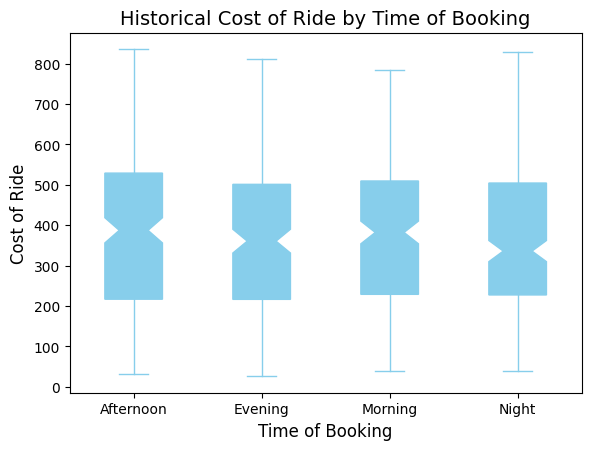

In [22]:
plt.figure(figsize=(10, 6))
dataset.boxplot(column="Historical_Cost_of_Ride", by="Time_of_Booking", grid=False, notch=True, patch_artist=True, color="skyblue")
plt.title("Historical Cost of Ride by Time of Booking", fontsize=14)
plt.suptitle("")  # Remove automatic title
plt.xlabel("Time of Booking", fontsize=12)
plt.ylabel("Cost of Ride", fontsize=12)
plt.show()

##### How does vehicle type affect historical ride costs?
(To incorporate vehicle class into pricing.)

<Figure size 1000x600 with 0 Axes>

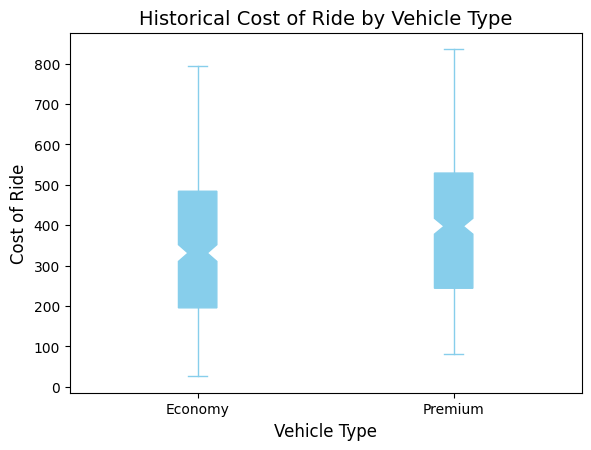

In [23]:
plt.figure(figsize=(10, 6))
dataset.boxplot(column="Historical_Cost_of_Ride", by="Vehicle_Type", grid=False, notch=True, patch_artist=True, color="skyblue")
plt.title("Historical Cost of Ride by Vehicle Type", fontsize=14)
plt.suptitle("")  # Remove automatic title
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Cost of Ride", fontsize=12)
plt.show()